In [323]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# Problem 1
## 1.1

In [324]:
housing_data = scipy.io.loadmat("data/housing_data.mat")

In [325]:
raw_x_train = pd.DataFrame(housing_data['Xtrain'])
raw_y_train = pd.DataFrame(housing_data['Ytrain'])
raw_x_validate = pd.DataFrame(housing_data['Xvalidate'])
raw_y_validate = pd.DataFrame(housing_data['Yvalidate'])
print(raw_x_train.shape, raw_y_train.shape)
print( raw_x_validate.shape,raw_y_validate.shape)

(19440, 8) (19440, 1)
(1200, 8) (1200, 1)


In [326]:
raw_x_train[9] = 1
raw_x_validate[9] = 1
print(raw_x_train.shape, raw_y_train.shape)
print(raw_x_validate.shape, raw_y_validate.shape)

(19440, 9) (19440, 1)
(1200, 9) (1200, 1)


In [329]:
X = raw_x_train.values
y = raw_y_train.values
x_val = raw_x_validate.values
y_val = raw_y_validate.values
w = np.zeros((1,8))

In [330]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
reg.coef_

array([[  4.05879986e+04,   1.19561189e+03,  -8.50145688e+00,
          1.18352188e+02,  -3.77900280e+01,   4.30562637e+01,
         -4.21794075e+04,  -4.24573474e+04,   0.00000000e+00]])

In [331]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T),y)
print(w.reshape((9,)))
y_hat = np.dot(x_val,w)

[  4.05879986e+04   1.19561189e+03  -8.50145688e+00   1.18352188e+02
  -3.77900280e+01   4.30562637e+01  -4.21794075e+04  -4.24573474e+04
  -3.56686439e+06]


## 1.2

In [332]:
rss = np.sum((y_val - y_hat) ** 2)
tss = np.sum((y_val - np.mean(y_val)) ** 2)
r_sqrd = 1 - (rss/tss)
print("RSS: %i" % rss)
print("R^2: %.3f" % r_sqrd)
print("Range of y Hat Values => Min: %i Max: %i" %(min(y_hat), max(y_hat)))
print("Range of True Y Values => Min: %i Max: %i" %(min(y_val), max(y_val)))

RSS: 5794953797674
R^2: 0.643
Range of y Hat Values => Min: -56562 Max: 710798
Range of True Y Values => Min: 28300 Max: 500001


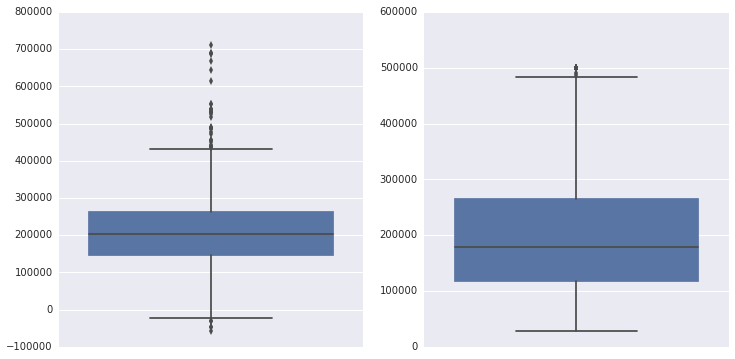

In [333]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.boxplot(y_hat, orient='v', ax=axes[0])
sns.boxplot(y_val, orient='v', ax=axes[1])

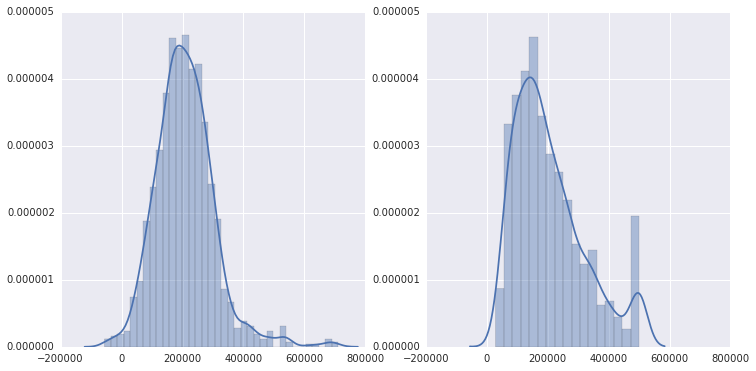

In [334]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.distplot(y_hat, ax=axes[0])
sns.distplot(y_val, ax=axes[1])

## 1.3

## 1.4

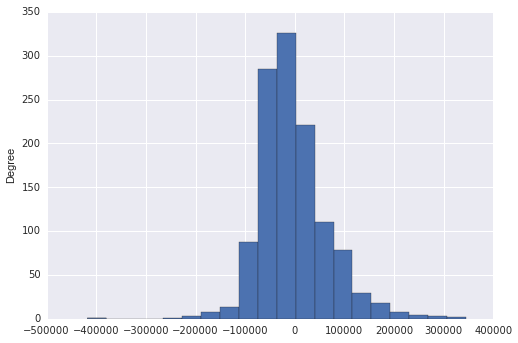

In [299]:
pd.Series((y_val - y_hat).reshape((1200,))).plot(kind='hist',bins=20)

This resembles the normal distribution! This is what we want out of our residuals - that our errors are drawn from a normal distribution and there isn't really any discernable patterns beyond the fact that no error is most common and large errors are rare.

# Problem 2

$$\dfrac{s}{x}$$

# Problem 3

In [348]:
spam_data = scipy.io.loadmat("data/spam.mat")
X = spam_data['Xtrain']
y = spam_data['Ytrain']
Xtest = spam_data['Xtest']

In [349]:
print(X.shape,y.shape,Xtest.shape)

(3450, 57) (3450, 1) (1151, 57)


# Problem 4

In [360]:
def batch_gd(X, y, w, learning_rate, num_iter):
    w_history = []
    for it in range(num_iter):
        w_history.append(w)
        w = w - learning_rate * np.sum((y - np.dot(X,w.T))**2)
    return w, w_history

In [361]:
w1, wh = batch_gd(X, y, np.zeros(X.shape[1]), 1, 1)
print(w1, wh)

[-11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500. -11902500. -11902500. -11902500.
 -11902500. -11902500. -11902500.] [array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])]


In [ ]:
def stochastic_gd(X, y, w, learning_rate, num_iter):
    pass